In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### 데이터 불러오기

In [2]:
# import pathlib
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)
# # 자료를 내 컴퓨터에 저장함

228827136/228813984 [==============================] - 13s 0us/step


In [3]:
# 파일로 있는 자료는 numpyarray로 되어있지 않아 train,test를 바로 나눌 수 없음
# 내 pc에 있는 자료들을 사용자가 지정한 개수만큼 미리 불러와서 메모리에 남겼다가 배치로 넘김
# 배치만큼만 데이터를 불러와서 배치 단위로 0,1...다 바꿔냄
# data loader 기능 

data_dir

WindowsPath('C:/Users/user/.keras/datasets/flower_photos')

### Keras 유틸리티를 사용하여 데이터 로드하기
- 사용자가 설정한 배치크기만큼 x,y 데이터셋을 제작하는 과정
    - 이미지 크기를 지정한 사이즈로 통일하고
    - x데이터를 세트로 array화 시키고
    - y값은 폴더이름에 따라서 순차적으로 0,1,2..를 부여함
    - 폴더이름을 class_names에 할당함
- x,y값을 사용자가 지정한 비율에 맞추어서 train, test로 분리

In [21]:
batch_size = 32
img_height = 180
img_width = 180

# 총 3670개의 자료
# validation_split=0.2 -> 총 3670개 중 80%는 train, 20%는 test
# train이 2963개, 이걸 배치사이즈로 묶으로 32개씩 91.75 -> 92개 묶음이 생김
# train_ds.take 0번에는 0~31개의 이미지, 0~31개의 레이블

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  # 훈련데이터
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
train_ds
# 180,180 3channel : x데이터 / None : y데이터

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [25]:
list(train_ds)
# 32 : 배치사이즈

[(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
  array([[[[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           ...,
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],
  
          [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           ...,
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02]],
  
          [[2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2.55000000e+02],
           [2.55000000e+02, 2.55000000e+02, 2

In [13]:
len(list(train_ds))
# 총 3670개의 자료
# validation_split=0.2 -> 총 3670개 중 80%는 train, 20%는 test
# train이 2963개, 이걸 배치사이즈로 묶으로 32개씩 91.75 -> 92개 묶음이 생김

92

In [26]:
list(train_ds)[0]
# 32개의 이미지의 레이블이 있는 92개 중 1번 묶음 (이미지, 레이블)
list(train_ds)[0][1] # 레이블만

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 2, 3, 3, 1, 2, 4, 4, 4, 4, 1, 4, 3, 1, 2, 1, 0, 3, 3, 0, 4, 3,
       3, 1, 4, 1, 4, 4, 1, 1, 1, 1])>

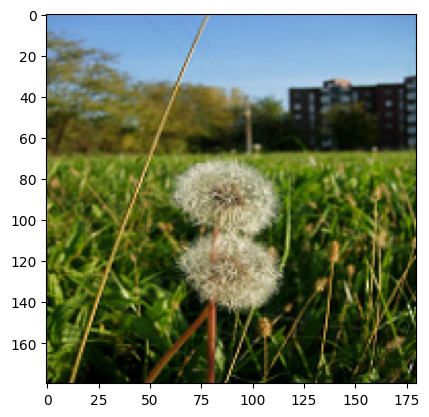

In [28]:
list(train_ds)[0][0] # 총 32개의 이미지
img=list(train_ds)[0][0][0]
plt.imshow(img.numpy().astype('uint8'))

In [29]:
##### 성능 높이기

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [62]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.4),
  ]
)

In [63]:
##### 모델 제작
# numpy로 받는 것들은 스케일링이 되어서 들어오는 경우가 있음
# 데이터를 외부에서 불러들이는 경우 255로 나누게 되어있음

num_classes = len(class_names)

# input size (180,180)
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),  
  # layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), # (90,90)
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),  # (45,45)
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(), # (23,23,64)
  layers.Dropout(0.2),  
  layers.Flatten(), # 23*23*64
  layers.Dense(128, activation='relu'), 
  layers.Dense(num_classes, activation='softmax')
])

In [64]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [66]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 3s 21ms/step - loss: 1.3301 - accuracy: 0.4186 - val_loss: 1.2354 - val_accuracy: 0.4714
Epoch 2/10
92/92 [==============================] - 2s 19ms/step - loss: 1.1208 - accuracy: 0.5436 - val_loss: 1.1078 - val_accuracy: 0.5736
Epoch 3/10
92/92 [==============================] - 2s 19ms/step - loss: 1.0524 - accuracy: 0.5712 - val_loss: 1.1088 - val_accuracy: 0.5708
Epoch 4/10
92/92 [==============================] - 2s 19ms/step - loss: 0.9886 - accuracy: 0.6172 - val_loss: 0.9454 - val_accuracy: 0.6349
Epoch 5/10
92/92 [==============================] - 2s 19ms/step - loss: 0.9479 - accuracy: 0.6178 - val_loss: 0.9071 - val_accuracy: 0.6608
Epoch 6/10
92/92 [==============================] - 2s 19ms/step - loss: 0.9113 - accuracy: 0.6543 - val_loss: 0.8965 - val_accuracy: 0.6608
Epoch 7/10
92/92 [==============================] - 2s 19ms/step - loss: 0.8459 - accuracy: 0.6693 - val_loss: 0.8465 - val_accuracy: 0.6676
Epoch 8/10
92

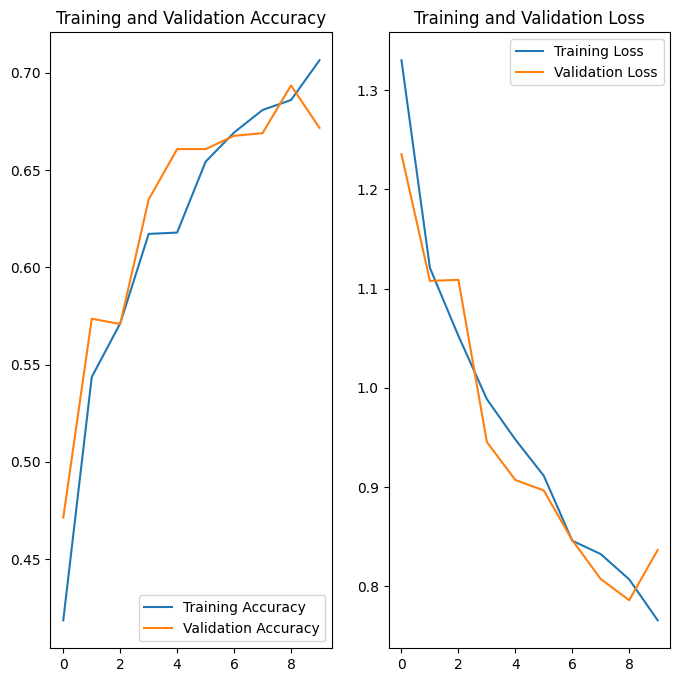

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 과적합 방지
- 데이터 증강
- 드롭아웃

In [ ]:
### confusion matrix & model save

In [ ]:
## 새로운 데이터로 예측

## 모델에 /255로 0~255의 이미지 값을 0~1 사이로 변경하는 아래의 레이어가 추가되어 있어서
## 새로운 데이터 예측하기에 /255를 할 필요가 없음
#  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

from PIL import Image
img=Image.open('.jpg').resize((180,180))
img=np.array(img)
img=np.reshape(img,(1,180,180,3))
predict=model.predict(img)

predictNum = np.argmax(predict)
class_names[predictNum]